# Tasks:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_trial = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse_trial = mouse_trial.merge(clinical_trial, on='Mouse ID')

# Display the data table for preview
clinical_mouse_trial.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint & Convert to DataFrame
mean_tumor_volume_df = clinical_mouse_trial.groupby(by=(['Drug', 'Timepoint'])).mean()

# Preview DataFrame
mean_tumor_volume_df.head(20)
mean_tumor_volume_df = mean_tumor_volume_df.drop(columns=('Metastatic Sites'))
mean_tumor_volume_df = mean_tumor_volume_df.reset_index(drop=False)
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint & Convert to DataFrame
std_error_tumor_volume_df = clinical_mouse_trial.groupby(by=(clinical_mouse_trial['Drug'], clinical_mouse_trial['Timepoint'])).sem()

# Preview DataFrame
std_error_tumor_volume_df.head(20)
std_error_tumor_volume_df = std_error_tumor_volume_df.drop(columns=(['Metastatic Sites', 'Mouse ID']))
std_error_tumor_volume_df = std_error_tumor_volume_df.reset_index(drop=False)
std_error_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_volume = tumor_volume.drop(columns=(['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']))
tumor_volume.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


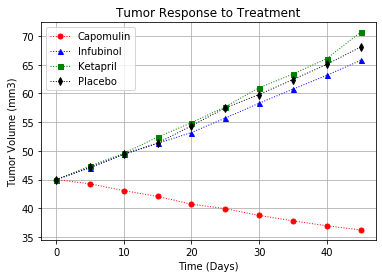

In [5]:
# Generate the Plot (with Error Bars)
plt.grid()

plt.plot(tumor_volume['Capomulin'], markersize=5, color='red', marker='o', linestyle=':', linewidth=1, label='Capomulin')
plt.plot(tumor_volume['Infubinol'], markersize=5, color='blue', marker='^', linestyle=':', linewidth=1, label='Infubinol')
plt.plot(tumor_volume['Ketapril'], markersize=5, color='green', marker='s', linestyle=':', linewidth=1, label='Ketapril')
plt.plot(tumor_volume['Placebo'], markersize=5, color='black', marker='d', linestyle=':', linewidth=1, label='Placebo')

# plt.errorbar(tumor_volume['Capomulin'], tumor_volume['Capomulin'].sem)

# Create a legend for our chart
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.legend()


# Show the chart
plt.show()
# Save the Figure



## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_df = clinical_mouse_trial.groupby(by=['Drug', 'Timepoint']).mean()
mean_met_site_df = mean_met_site_df.drop(columns='Tumor Volume (mm3)')


# Preview DataFrame
mean_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
mean_met_site_pivot = mean_met_site_df.reset_index(drop=False)
mean_met_site_pivot = mean_met_site_pivot.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_met_site_pivot = mean_met_site_pivot.drop(columns=(['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']))
mean_met_site_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met_df = clinical_mouse_trial.groupby(by=['Drug', 'Timepoint']).sem()
standard_error_met_df = standard_error_met_df.drop(columns=['Mouse ID', 'Tumor Volume (mm3)'])

# Preview DataFrame
standard_error_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
standard_error_met_df = standard_error_met_df.reset_index(drop=False)
met_pivot = standard_error_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
met_pivot = met_pivot.drop(columns=(['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']))
# Preview that Reformatting worked
met_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


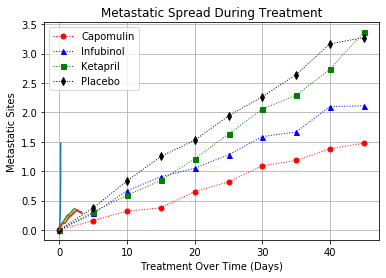

In [191]:
# Generate the Plot (with Error Bars)
plt.plot(mean_met_site_pivot['Capomulin'], markersize=5, color='red', marker='o', linestyle=':', linewidth=1, label='Capomulin')
plt.plot(mean_met_site_pivot['Infubinol'], markersize=5, color='blue', marker='^', linestyle=':', linewidth=1, label='Infubinol')
plt.plot(mean_met_site_pivot['Ketapril'], markersize=5, color='green', marker='s', linestyle=':', linewidth=1, label='Ketapril')
plt.plot(mean_met_site_pivot['Placebo'], markersize=5, color='black', marker='d', linestyle=':', linewidth=1, label='Placebo')
plt.errorbar(met_pivot['Capomulin'], mean_met_site_pivot['Capomulin'])
plt.errorbar(mean_met_site_pivot['Infubinol'], met_pivot['Infubinol'])
plt.errorbar(mean_met_site_pivot['Ketapril'], met_pivot['Ketapril'])
plt.errorbar(mean_met_site_pivot['Placebo'], met_pivot['Placebo'])


# Save the Figure
plt.ylabel('Metastatic Sites')
plt.xlabel('Treatment Over Time (Days)')
plt.title('Metastatic Spread During Treatment')
plt.legend()
plt.grid()

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = clinical_mouse_trial.groupby(by=['Drug', 'Timepoint']).count()
survival = survival.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])


# Convert to DataFrame

# Preview DataFrame
survival.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival = ((survival/25) * 100)

survival_pivot = survival.reset_index(drop=False)


survival_pivot = survival_pivot.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
survival_pivot = survival_pivot.drop(columns=['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
# Preview the Data Frame
survival_pivot.head(15)


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


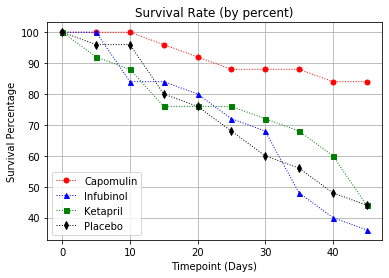

In [13]:
# Generate the Plot (Accounting for percentages)
plt.plot(survival_pivot['Capomulin'], markersize=5, color='red', marker='o', linestyle=':', linewidth=1, label='Capomulin')
plt.plot(survival_pivot['Infubinol'], markersize=5, color='blue', marker='^', linestyle=':', linewidth=1, label='Infubinol')
plt.plot(survival_pivot['Ketapril'], markersize=5, color='green', marker='s', linestyle=':', linewidth=1, label='Ketapril')
plt.plot(survival_pivot['Placebo'], markersize=5, color='black', marker='d', linestyle=':', linewidth=1, label='Placebo')

plt.legend()
plt.grid()
plt.title('Survival Rate (by percent)')
plt.ylabel('Survival Percentage')
plt.xlabel('Timepoint (Days)')

# Show the Figure
plt.show()

## Summary Bar Graph

In [149]:
# Calculate the percent changes for each drug
tumor_volume = tumor_volume.reset_index(drop=True)

tumor_volume_change = tumor_volume.iloc[-1] - tumor_volume.iloc[0] 

tumor_volume_percent_change = (tumor_volume_change / tumor_volume.iloc[0]) * 100

# # Display the data to confirm
percent_change_list = tumor_volume_percent_change.tolist()
percent_change_list_index = tumor_volume_percent_change.index.tolist()

percent_values = []

for i in percent_change_list:
    value = round(i, 2)
    percent_values.append(str(value)+ '%')
    
percent_values

['-19.48%', '46.12%', '57.03%', '51.3%']

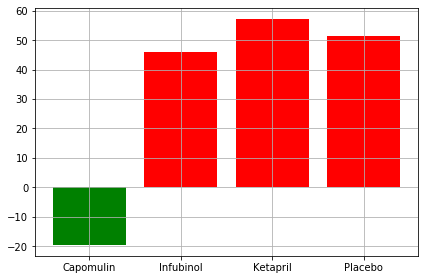

In [184]:
# Store all Relevant Percent Changes into a Tuple

colors = ["green", "red", "red", "red"]

x_axis = np.arange(0, 4)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

ax.set_title("Metastatic Change by Treatment")
ax.set_xlabel("Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticklabels(percent_values)


ax.set_xlim(-0.75, len(percent_change_list_index)-.25)
ax.set_ylim(-30, 60)

plt.bar(x_axis, percent_change_list, color=colors, align="center")
plt.xticks(tick_locations, percent_change_list_index)
plt.tight_layout()

plt.grid()

# Show the Figure
fig.show()